In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
new_census = pd.read_csv('new_census.csv')
new_census.columns

Index(['Unnamed: 0', 'Date', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'ObservationTimeApproximate', 'UTMNorthing', 'UTMEasting',
       'LocationApproximate', 'ST', 'STUncertain', 'SM', 'SMUncertain', 'SF',
       'SFUncertain', 'SU', 'SUUncertain', 'SA', 'SAUncertain', 'SAM',
       'SAMUncertain', 'SAF', 'SAFUncertain', 'SAFP', 'SAFPUncertain', 'SAFL',
       'SAFLUncertain', 'SAFEN', 'SAFENUncertain', 'SAU', 'SAUUncertain', 'SS',
       'SSUncertain', 'SSM', 'SSMUncertain', 'SSF', 'SSFUncertain', 'SSU',
       'SSUUncertain', 'SJ', 'SJUncertain', 'SJM', 'SJMUncertain', 'SJF',
       'SJFUncertain', 'SJU', 'SJUUncertain', 'IT', 'ITUncertain', 'IM',
       'IMUncertain', 'IF', 'IFUncertain', 'IU', 'IUUncertain', 'IA',
       'IAUncertain', 'IAM', 'IAMUncertain', 'IAF', 'IAFUncertain', 'IAFP',
       'IAFPUncertain', 'IAFL', 'IAFLUncertain', 'IAFEN', 'IAFENUncertain',
       'IAU', 'IAUUncertain', 'IS', 'ISUncertain', 'ISM', 'ISMUncertain',
       'ISF', 'ISFUncertain', 'ISU', 'ISUUnce

In [3]:
#new_census.loc[:,'tdint']
new_census.tdint.unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [4]:
nc_q34 = new_census[(new_census.quarter == 3) | (new_census.quarter == 4)]
nc_q34.quarter.unique()

array([3, 4])

In [5]:
pd.options.display.max_rows = 100

#identify unique troop-year combinations
uniq_troop_tdint = new_census.drop_duplicates(['tdint','Troop'])[['tdint','Troop']]
uniq_troop_tdint = uniq_troop_tdint

#remove the groups that underwent fusions, because they are allowed to have increases in group size during quarters 3 & 4
#probably should just look at these/read comments and see if they can go through this function or if we should adjust by hand...?
#are there other instances of fusions that wouldn't be apparent from the presence of / in the troop name? 
uniq_troop_tdint = uniq_troop_tdint[~uniq_troop_tdint.Troop.str.contains("/")] 

uniq_troop_tdint

,tdint,Troop
0,-1,CGL
25,0,CGL
77,1,CGL
130,2,CGL
182,3,CGL
234,4,CGL
286,5,CGL
338,6,CGL
390,7,CGL
443,8,CGL


In [6]:
uniq_troop_tdint.index=range(0,(np.shape(uniq_troop_tdint)[0])) #re-index the unique troop/tdint combinations

#subset the census to have just the data from one troop year in quarters 3 & 4
#because in quarters 3 and 4, group size should only be able to decrease. 
cens_sub = new_census.loc[(new_census.Troop.str.contains(uniq_troop_tdint.Troop[0])) & 
               (new_census.tdint == uniq_troop_tdint.tdint[0]) & (new_census.quarter>2)]
cens_sub

,Unnamed: 0,Date,Unnamed: 0.1,Unnamed: 0.1.1,ObservationTimeApproximate,UTMNorthing,UTMEasting,LocationApproximate,ST,STUncertain,...,S,J,TDiff,ObsYear,ObsMonth,week,tdate,tdint,quarter,Troop
0,0,5/11/2008,0.000000,1.000000,0.0,8026213.000,296182.0000,0.0,33.000000,0.000000,...,7.0,NaN,NaN,2008.0,5.000000,28,0.526027,-1,3,CGL
1,1,5/18/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,29,0.545205,-1,3,CGL
2,2,5/25/2008,21.000000,60.000000,0.0,8026268.000,296165.0000,0.0,44.000000,0.000000,...,11.0,NaN,11.000000,2008.0,5.000000,30,0.564384,-1,3,CGL
3,3,6/1/2008,35.333333,103.333333,0.0,8026307.000,296118.6667,0.0,28.333333,0.000000,...,13.0,1.0,-5.000000,2008.0,5.000000,31,0.583562,-1,3,CGL
4,4,6/8/2008,58.600000,169.400000,0.0,8026203.000,296122.0000,0.0,48.600000,0.800000,...,25.0,4.0,5.200000,2008.0,6.000000,32,0.602740,-1,3,CGL
5,5,6/15/2008,95.000000,246.500000,0.0,8026136.250,296121.0000,0.0,43.250000,0.000000,...,8.0,4.0,-0.250000,2008.0,6.000000,33,0.621918,-1,3,CGL
6,6,6/22/2008,123.500000,315.500000,0.0,8026176.000,296117.0000,0.0,49.500000,0.000000,...,9.0,5.0,-3.000000,2008.0,6.000000,34,0.641096,-1,3,CGL
7,7,6/29/2008,152.750000,379.500000,0.0,8026202.500,296067.0000,0.0,35.250000,0.000000,...,9.0,5.0,-3.750000,2008.0,6.000000,35,0.660274,-1,3,CGL
8,8,7/6/2008,184.666667,450.333333,0.0,8026195.000,296248.0000,0.0,42.000000,0.333333,...,6.0,6.0,5.666667,2008.0,6.666667,36,0.679452,-1,3,CGL
9,9,7/13/2008,215.000000,513.333333,0.0,8026159.667,296108.6667,0.0,26.000000,0.500000,...,9.0,NaN,-4.666667,2008.0,7.000000,37,0.698630,-1,3,CGL


In [7]:
#latest date on which the group was at its max group size
maxgrp=max(cens_sub['T'])
tdate_maxgrp = max(cens_sub.tdate[cens_sub['T']==maxgrp])

#assign preceding dates the max group size
#since we have to assume that max possible individuals were present 
#at the end of quarter 2 (only deaths, no births/additions generally after Q2)
#and no way for group size to increase again... meaning that the latest date at which 
#the group was at its max is probably realistic, whereas decreases and increases to that max are 
#incomplete counts... 
cens_sub.loc[cens_sub['tdate'] <= tdate_maxgrp,'new_T'] = maxgrp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
cens_sub[['T','new_T']]

,T,new_T
0,34.0,51.0
1,40.0,51.0
2,45.0,51.0
3,29.0,51.0
4,49.0,51.0
5,43.0,51.0
6,51.0,51.0
7,36.0,51.0
8,43.0,51.0
9,26.0,51.0


In [9]:
count_list = cens_sub.loc[cens_sub['tdate'] > tdate_maxgrp,'T']
for i in count_list.index:
    #if not all subsequent counts are less than index count, then the index count is probably incomplete
    #because can only have decreasing population size
    if any(count_list[i] < count_list[count_list.index>i]):
        #get the max of the future counts
        all_fut_counts=count_list[count_list.index>i]
        max_fut_counts = max(all_fut_counts)
        
        #choose the most recent previous count that's greater than the max future count
        all_prev_counts=cens_sub.new_T[cens_sub.new_T.index<16]
        all_greater_prev_counts = all_prev_counts[all_prev_counts > max_fut_counts]
        recent_prev_count = cens_sub.new_T[max(all_greater_prev_counts.index)]
        
        #assign the count to be the mean of those two counts
        cens_sub.new_T.iloc[[i]] = (int(max_fut_counts) + int(recent_prev_count))/2
    
    #otherwise, if subsequent counts are less, then index count is fine
    else:
        cens_sub.new_T.iloc[[i]] = count_list[i]
        
cens_sub[['T','new_T']]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,T,new_T
0,34.0,51.0
1,40.0,51.0
2,45.0,51.0
3,29.0,51.0
4,49.0,51.0
5,43.0,51.0
6,51.0,51.0
7,36.0,51.0
8,43.0,51.0
9,26.0,51.0


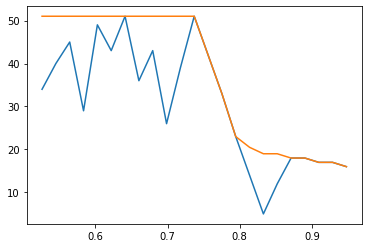

In [10]:
plt.plot('tdate','T', data=cens_sub)
plt.plot('tdate','new_T', data=cens_sub)

plt.show()